<a href="https://colab.research.google.com/github/matiascabrejos/IA-Humai/blob/main/exercise_class4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
ipc_df = pd.read_csv('https://datasets-humai.s3.amazonaws.com/datasets/ipc_indec.csv')

In [3]:
ipc_df.head()

,Apertura,Dec-16,Jan-17,Feb-17,Mar-17,Apr-17,May-17,Jun-17,Jul-17,Aug-17,...,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20,Feb-20,Mar-20,Apr-20,May-20,Jun-20
0,Nivel general,100.0,101.6,103.7,106.1,109.0,110.5,111.8,113.8,115.4,...,253.7,262.1,273.2,283.4,289.8,295.7,305.6,310.1,314.9,322.0
1,Estacional,100.0,101.7,102.3,104.8,108.2,109.1,110.1,110.6,111.8,...,217.0,223.2,239.6,244.7,253.6,260.0,272.7,285.9,299.3,313.6
2,Núcleo,100.0,101.5,103.2,105.2,107.4,109.2,110.7,112.6,114.2,...,250.5,260.0,270.4,280.3,287.2,294.0,303.2,308.4,313.3,320.6
3,Regulados,100.0,101.8,105.9,110.0,114.5,115.7,116.7,119.4,121.1,...,284.7,290.5,301.6,315.5,319.1,321.3,331.9,329.7,329.4,331.8


In [4]:
ipc_df.columns

Index(['Apertura', 'Dec-16', 'Jan-17', 'Feb-17', 'Mar-17', 'Apr-17', 'May-17',
       'Jun-17', 'Jul-17', 'Aug-17', 'Sep-17', 'Oct-17', 'Nov-17', 'Dec-17',
       'Jan-18', 'Feb-18', 'Mar-18', 'Apr-18', 'May-18', 'Jun-18', 'Jul-18',
       'Aug-18', 'Sep-18', 'Oct-18', 'Nov-18', 'Dec-18', 'Jan-19', 'Feb-19',
       'Mar-19', 'Apr-19', 'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19',
       'Oct-19', 'Nov-19', 'Dec-19', 'Jan-20', 'Feb-20', 'Mar-20', 'Apr-20',
       'May-20', 'Jun-20'],
      dtype='object')

In [5]:
pd.melt(ipc_df,
        id_vars=['Apertura']
        ).head()

,Apertura,variable,value
0,Nivel general,Dec-16,100.0
1,Estacional,Dec-16,100.0
2,Núcleo,Dec-16,100.0
3,Regulados,Dec-16,100.0
4,Nivel general,Jan-17,101.6


In [6]:
ipc_df2 = pd.melt(ipc_df,
                  id_vars = ['Apertura'],
                  var_name = 'Fecha',
                  value_name = 'Indice'
                  )

In [7]:
ipc_df2

,Apertura,Fecha,Indice
0,Nivel general,Dec-16,100.0
1,Estacional,Dec-16,100.0
2,Núcleo,Dec-16,100.0
3,Regulados,Dec-16,100.0
4,Nivel general,Jan-17,101.6
...,...,...,...
167,Regulados,May-20,329.4
168,Nivel general,Jun-20,322.0
169,Estacional,Jun-20,313.6
170,Núcleo,Jun-20,320.6


In [8]:
ipc_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Apertura  172 non-null    object 
 1   Fecha     172 non-null    object 
 2   Indice    172 non-null    float64
dtypes: float64(1), object(2)
memory usage: 4.2+ KB


In [9]:
ipc_df2["Fecha"] = pd.to_datetime(ipc_df2["Fecha"], format="%b-%y")

In [10]:
ipc_df2.head()

,Apertura,Fecha,Indice
0,Nivel general,2016-12-01,100.0
1,Estacional,2016-12-01,100.0
2,Núcleo,2016-12-01,100.0
3,Regulados,2016-12-01,100.0
4,Nivel general,2017-01-01,101.6


In [11]:
ipc_df2 = ipc_df2.set_index("Fecha")

In [12]:
ipc_df2['Año'] = ipc_df2.index.year
ipc_df2['Mes'] = ipc_df2.index.month

In [13]:
ipc_df2.head()

,Apertura,Indice,Año,Mes
Fecha,,,,
2016-12-01,Nivel general,100.0,2016,12
2016-12-01,Estacional,100.0,2016,12
2016-12-01,Núcleo,100.0,2016,12
2016-12-01,Regulados,100.0,2016,12
2017-01-01,Nivel general,101.6,2017,1


In [14]:
ipc_df2.groupby(['Apertura', 'Año']).aggregate({
                                        'Indice':['mean','median','max']})

Indice               
                          mean  median    max
Apertura      Año                            
Estacional    2016  100.000000  100.00  100.0
              2017  111.366667  110.35  121.5
              2018  139.958333  137.05  164.3
              2019  198.083333  189.15  244.7
              2020  280.850000  279.30  313.6
Nivel general 2016  100.000000  100.00  100.0
              2017  112.891667  112.80  124.8
              2018  151.583333  147.05  184.3
              2019  232.758333  228.00  283.4
              2020  306.350000  307.85  322.0
Núcleo        2016  100.000000  100.00  100.0
              2017  111.491667  111.65  121.1
              2018  146.825000  142.75  178.9
              2019  228.291667  222.55  280.3
              2020  304.450000  305.80  320.6
Regulados     2016  100.000000  100.00  100.0
              2017  118.283333  118.05  138.7
              2018  173.716667  166.85  212.9
              2019  266.600000  267.40  315.5
              2020  327.200000  329.55  331.9

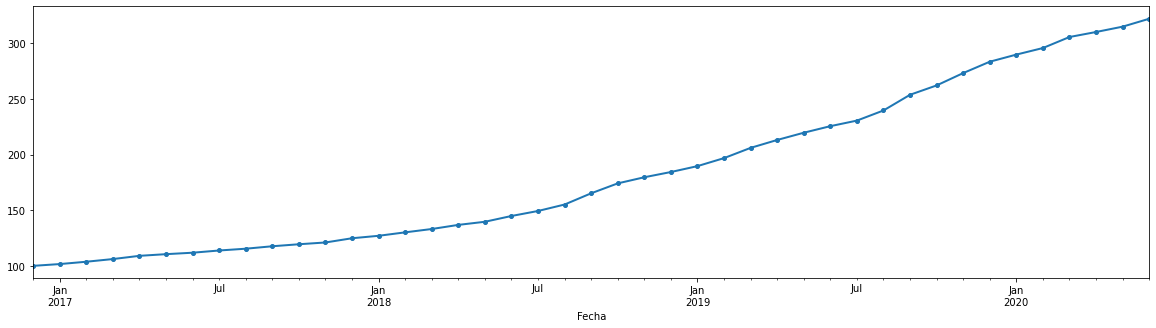

In [15]:
ipc_df2[ipc_df2.Apertura == 'Nivel general'].Indice.plot(style='-o', linewidth=2, ms=4, figsize = (20, 5))

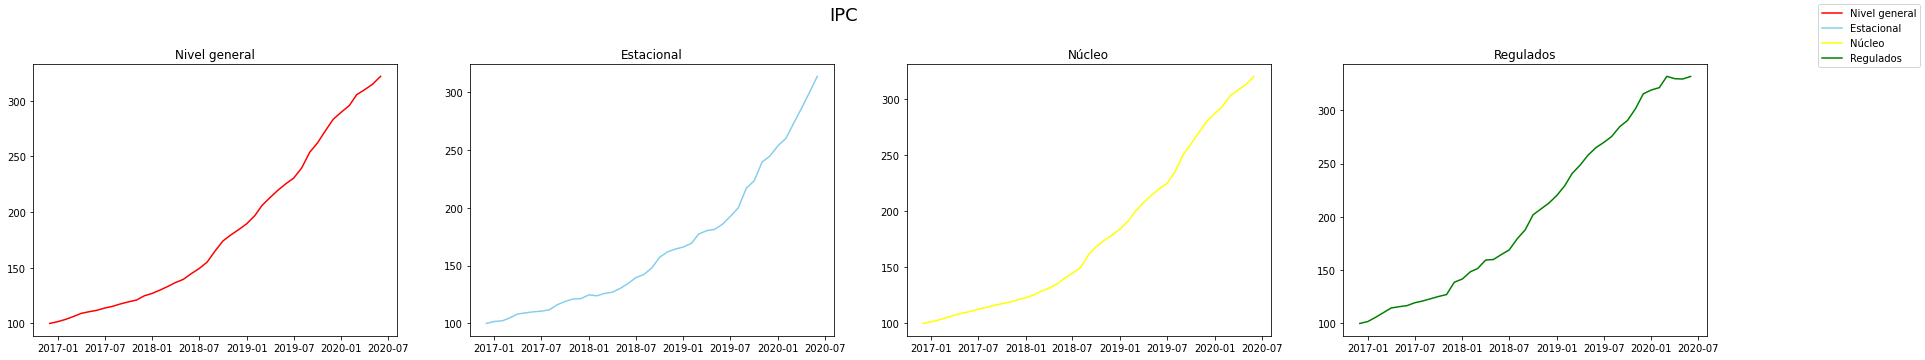

In [20]:
fig, ax = plt.subplots(figsize = (30,5), ncols=4, nrows=1)  

fig.suptitle('IPC', fontsize=18, y = 1.04) 

ax[0].set_title('Nivel general')
ax[1].set_title('Estacional')
ax[2].set_title('Núcleo')
ax[3].set_title('Regulados')

ax[0].plot(ipc_df2[ipc_df2.Apertura == 'Nivel general'].Indice, color='red', label = 'Nivel general')
ax[1].plot(ipc_df2[ipc_df2.Apertura == 'Estacional'].Indice, color='skyblue', label = 'Estacional')
ax[2].plot(ipc_df2[ipc_df2.Apertura == 'Núcleo'].Indice, color='yellow', label = 'Núcleo')
ax[3].plot(ipc_df2[ipc_df2.Apertura == 'Regulados'].Indice, color='green', label = 'Regulados')


fig.legend()
fig.show()

No handles with labels found to put in legend.


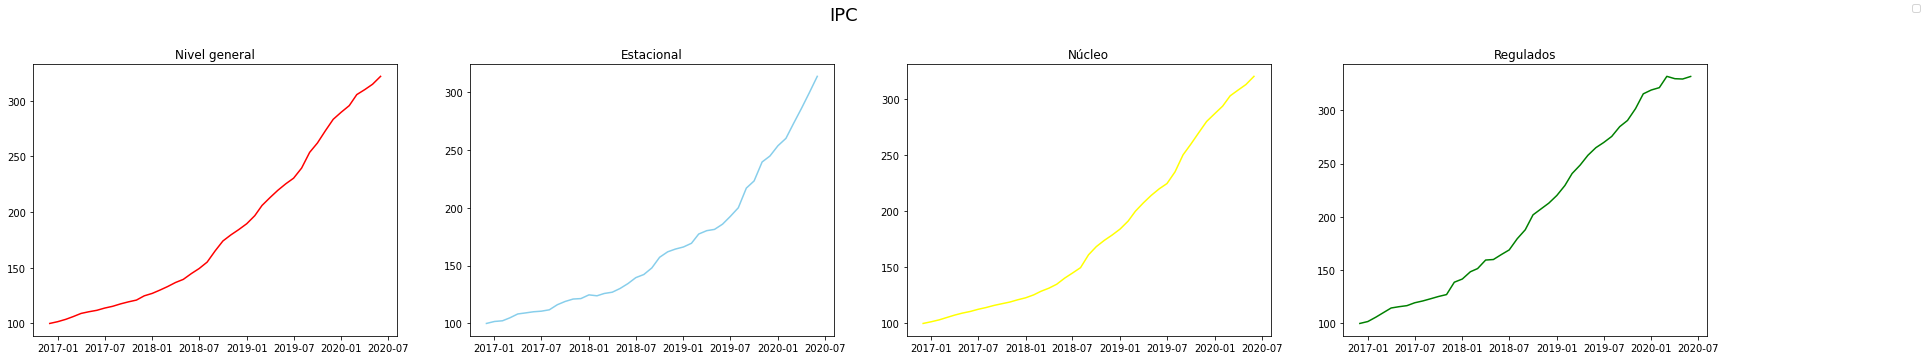

In [34]:
fig, ax = plt.subplots(figsize = (30,5), ncols=4, nrows=1)  

fig.suptitle('IPC', fontsize=18, y = 1.04) 

ax[0].set_title('Nivel general')
ax[1].set_title('Estacional')
ax[2].set_title('Núcleo')
ax[3].set_title('Regulados')

ax[0].plot(ipc_df2[ipc_df2.Apertura == 'Nivel general'].Indice, color='red')
ax[1].plot(ipc_df2[ipc_df2.Apertura == 'Estacional'].Indice, color='skyblue')
ax[2].plot(ipc_df2[ipc_df2.Apertura == 'Núcleo'].Indice, color='yellow')
ax[3].plot(ipc_df2[ipc_df2.Apertura == 'Regulados'].Indice, color='green')


fig.legend()
fig.show()